# Spectral generator demo

A demo which uses the _generate_spectra_ function from the spectral_generator.py file.
The calibration dataset is loaded in, the model is calibrated, and some datasets are simulated to describe how the function works.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spectral_generator import generate_spectra

In [2]:
# helper function to plot spectra
def plot_spectra(X, y):
    X_ = pd.DataFrame(X).copy(deep=True)
    X_.columns = np.arange(0, X.shape[1])
    
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(10, 10)

    ax0 = fig.add_subplot(gs[:5, 1:9])
    ax1 = fig.add_subplot(gs[5:, :5])
    ax2 = fig.add_subplot(gs[5:, 5:])
    
    ax0.plot(X_.T)
    
    ax1.plot(X_.mean(axis=0))
    ax2.plot(X_.std(axis=0))
    
    ax0.set_title('All spectra')
    ax1.set_title('Mean spectrum')
    ax2.set_title('Standard deviation spectrum')
    ax0.set_ylabel('Absorbance [a.u.]')
    ax1.set_ylabel('Absorbance [a.u.]')
    ax2.set_ylabel('Standard deviation [a.u.]')
    
    for ax in [ax0, ax1, ax2]:
        ax.set_xticks([])
        ax.set_xlabel('Wavenumber [cm$^{-1}$]')
    
    plt.tight_layout()
    plt.show()

## Loading input data 

Spectral data is used for calibrating the model. Data from the lung cancer vs. non-symptomatic controls is used for this demo. Water measurement are loaded in as well to calculate the measurement noise.

### Blood serum spectra

In [3]:
serum_spectra = pd.concat((pd.read_csv('data/dataset_1_part_%s.csv' % f.zfill(2)) for f in np.arange(1, 21).astype(str)), ignore_index=True) # load the cancer and non-cancer spectra from file

In [4]:
X = serum_spectra.iloc[0:100000, 1:] # matrix containing the spectra of lung cancer and control samples. Samples in rows, wavenumers in columns
X.columns = X.columns.astype(float)

y = serum_spectra.iloc[0:100000, 0] # vector containing the sample labels
y = y.replace({'lung cancer control': 0, 'lung cancer case': 1})

In [5]:
# sample 2000 spectra from the 100000 spectra (for faster performance)
idx = np.random.choice(np.arange(100000), 2000, replace=False)
X = X.iloc[idx]
y = y.iloc[idx]

In [6]:
display(X)

,1000.816143,1002.742871,1004.669599,1006.596328,1008.523056,1010.449784,1012.376512,1014.303240,1016.229968,1018.156696,...,2981.492634,2983.419362,2985.346091,2987.272819,2989.199547,2991.126275,2993.053003,2994.979731,2996.906459,2998.833187
20418,-0.000222,0.000048,0.000403,0.000832,0.001291,0.001778,0.002196,0.002567,0.002847,0.003157,...,0.016186,0.015154,0.014104,0.013119,0.012228,0.011391,0.010655,0.010048,0.009437,0.009040
83646,-0.000186,0.000006,0.000293,0.000634,0.001067,0.001407,0.001818,0.002082,0.002271,0.002456,...,0.017340,0.016222,0.015164,0.014172,0.013271,0.012450,0.011771,0.011118,0.010635,0.010240
15754,0.000328,0.000548,0.000924,0.001363,0.001890,0.002404,0.002836,0.003168,0.003452,0.003720,...,0.017529,0.016429,0.015339,0.014384,0.013461,0.012651,0.011927,0.011326,0.010815,0.010428
28660,-0.000988,-0.000825,-0.000545,-0.000180,0.000214,0.000604,0.000953,0.001202,0.001382,0.001524,...,0.016146,0.015023,0.014039,0.013068,0.012122,0.011347,0.010593,0.009911,0.009400,0.008948
8437,-0.000283,-0.000051,0.000230,0.000586,0.001045,0.001496,0.001878,0.002181,0.002392,0.002668,...,0.017237,0.016190,0.015154,0.014226,0.013325,0.012559,0.011805,0.011206,0.010605,0.010250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51831,0.001157,0.001456,0.001818,0.002290,0.002849,0.003413,0.003957,0.004354,0.004714,0.005101,...,0.018024,0.016978,0.015969,0.015017,0.014151,0.013361,0.012644,0.012024,0.011539,0.011113
15542,-0.001404,-0.001161,-0.000886,-0.000560,-0.000179,0.000207,0.000502,0.000728,0.000898,0.001067,...,0.015741,0.014594,0.013512,0.012498,0.011553,0.010718,0.009905,0.009208,0.008617,0.008134
37422,-0.000786,-0.000557,-0.000287,0.000045,0.000430,0.000828,0.001134,0.001331,0.001474,0.001594,...,0.017417,0.016407,0.015420,0.014531,0.013639,0.012842,0.012104,0.011534,0.011030,0.010612
58731,0.001218,0.001474,0.001815,0.002240,0.002734,0.003271,0.003723,0.004074,0.004428,0.004751,...,0.018360,0.017356,0.016387,0.015448,0.014593,0.013805,0.013170,0.012574,0.012081,0.011660


In [7]:
display(y)

20418    0
83646    1
15754    0
28660    0
8437     0
        ..
51831    1
15542    0
37422    0
58731    1
64295    1
Name: target, Length: 2000, dtype: int64

### Water spectra

In [8]:
water_spectra = pd.read_csv('data/dataset_2.csv') # load the mean-subtracted water spectra from file
water_spectra.columns = water_spectra.columns.astype(float)

In [9]:
display(water_spectra)

,1000.816143,1002.742871,1004.669599,1006.596328,1008.523056,1010.449784,1012.376512,1014.303240,1016.229968,1018.156696,...,2981.492634,2983.419362,2985.346091,2987.272819,2989.199547,2991.126275,2993.053003,2994.979731,2996.906459,2998.833187
0,-3.212814e-06,-3.055689e-06,-2.476283e-06,-1.733656e-06,-7.738353e-07,-3.855593e-07,-1.186729e-06,-1.849676e-06,-1.490719e-06,-1.110812e-06,...,-1.204071e-06,-8.665961e-07,-9.156575e-07,-9.426045e-07,-1.014360e-06,-1.001794e-06,-5.858619e-07,-3.256754e-07,-3.867881e-07,-3.369293e-07
1,-2.530688e-06,-2.185765e-06,-1.757428e-06,-1.593712e-06,-2.194079e-06,-3.011644e-06,-3.546082e-06,-3.435222e-06,-2.481520e-06,-1.653769e-06,...,1.117278e-06,1.672151e-06,2.049984e-06,2.115092e-06,2.394173e-06,2.817683e-06,2.768746e-06,2.436794e-06,2.133048e-06,1.397884e-06
2,-2.703286e-06,-1.653784e-06,1.864061e-08,-1.050924e-07,-1.159687e-06,-2.075248e-06,-2.687166e-06,-2.216935e-06,-1.575374e-06,-1.580571e-06,...,6.801964e-07,8.118190e-07,1.516860e-06,1.913497e-06,2.221770e-06,2.559234e-06,2.157801e-06,1.235194e-06,4.025570e-07,-8.599657e-08
3,-1.116429e-06,-2.392958e-06,-3.407281e-06,-4.126047e-06,-4.297484e-06,-3.896348e-06,-3.329803e-06,-2.368092e-06,-1.605913e-06,-2.168756e-06,...,1.154092e-06,1.102175e-06,8.836039e-07,8.045648e-07,1.006813e-06,1.574977e-06,1.736856e-06,1.413036e-06,1.418150e-06,1.376632e-06
4,-2.966924e-06,-2.684066e-06,-2.068514e-06,-1.821372e-06,-2.410525e-06,-3.303748e-06,-2.983956e-06,-1.502259e-06,-5.978393e-07,-2.721182e-07,...,-5.270270e-07,-2.303793e-07,3.777074e-08,-7.136784e-09,-6.457429e-07,-1.185564e-06,-1.433046e-06,-1.283866e-06,-4.202294e-07,6.083164e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-3.600196e-07,-1.100939e-06,-2.042994e-06,-1.833621e-06,-2.731207e-07,7.069937e-07,9.433609e-07,4.191681e-08,-2.291458e-06,-4.077113e-06,...,-1.359760e-06,-1.204704e-06,-9.710837e-07,-6.929523e-07,-8.420492e-07,-6.817679e-07,1.313274e-07,2.983087e-07,-3.152188e-07,-6.919225e-07
396,2.706912e-07,1.150386e-06,1.339129e-06,1.558347e-07,-5.229103e-07,4.959198e-08,-2.925586e-07,-8.411041e-07,-4.478697e-07,-4.354949e-07,...,4.335875e-07,4.413871e-07,2.809142e-07,-6.845506e-08,-2.936554e-07,-7.591257e-08,7.612629e-07,1.575449e-06,1.422555e-06,9.579098e-07
397,5.636604e-07,8.715475e-08,-3.272370e-08,5.198307e-07,8.370951e-07,7.981592e-07,5.895422e-07,8.286251e-07,1.426294e-06,1.688136e-06,...,5.455197e-07,9.716769e-08,2.448518e-07,7.694284e-07,1.113765e-06,1.200120e-06,1.207441e-06,1.175824e-06,1.358322e-06,1.980578e-06
398,-1.548109e-06,-8.581850e-07,1.688001e-07,7.153705e-07,1.689560e-07,-9.878476e-07,-2.232104e-06,-2.816621e-06,-1.554120e-06,-9.717523e-10,...,1.617052e-06,2.227781e-06,1.882340e-06,1.256655e-06,9.665970e-07,6.164331e-07,6.448912e-07,1.061978e-06,7.891770e-07,7.669816e-07


## Defining the calibration parameters

Parameters are calculated from the input data and will be given as inputs to the _spectral_generator_ function.

### Calculating the biological properties

In [10]:
mu_neg = X[y==0].mean(axis=0) # mean spectrum of control samples
mu_pos = X[y==1].mean(axis=0) # mean spectrum of case samples

B_neg = X[y==0] - mu_neg # calibration vectors for control samples
B_pos = X[y==1] - mu_pos # calibration vectors for case samples

d = mu_pos - mu_neg # discriminant vector, defining the difference in mean between cases and controls

### Calculating the measurement noise

In [11]:
epsilon_std = water_spectra.std(axis=0) # standard deviation across the spectral features of the water measurements
epsilon_std *= 9.15 # scaling factor, to account for the L2 vector normalization in the preprocessing of the sera measurements

## Generating spectra

Creating a dataset of 1000 cases and 1000 controls at the calibrated levels of biological variability and measurement noise. At the calibrated levels, the generated spectra are made to model the same properties as the input calibration measurements.

In [12]:
X_gen, y_gen = generate_spectra(B_neg=B_neg, B_pos=B_pos, 
                                mu_neg=mu_neg, mu_pos=mu_pos, 
                                n_neg=1000, n_pos=1000, 
                                beta_std_neg='auto', beta_std_pos='auto', 
                                epsilon_std=epsilon_std, 
                                random_state=42)

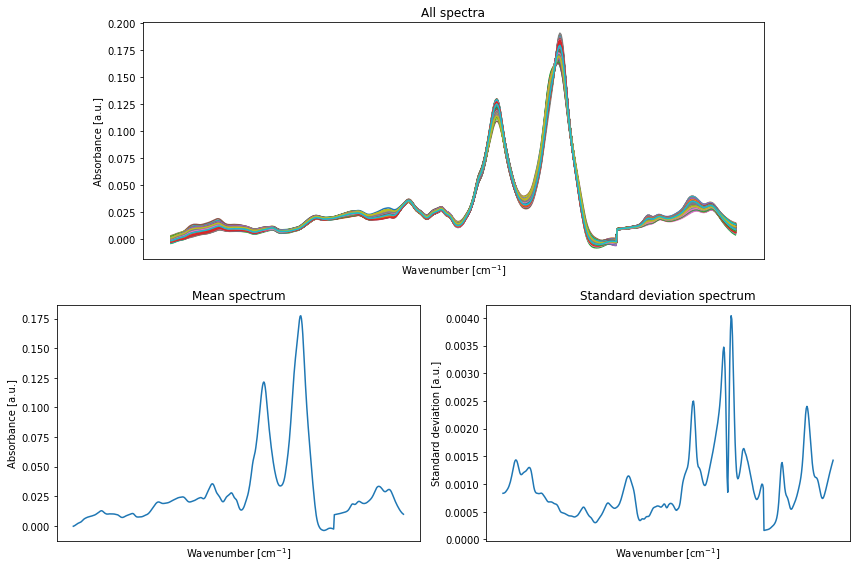

In [13]:
plot_spectra(X_gen, y_gen)

Creating a dataset of 5000 cases and 5000 controls at a level of biological variability 2 times higher than the calibrated level.

In [14]:
X_gen, y_gen = generate_spectra(B_neg=B_neg, B_pos=B_pos, 
                                mu_neg=mu_neg, mu_pos=mu_pos, 
                                n_neg=1000, n_pos=1000, 
                                beta_std_neg=2/np.sqrt(B_neg.shape[0]), beta_std_pos=2/np.sqrt(B_pos.shape[0]), 
                                epsilon_std=epsilon_std, 
                                random_state=42)

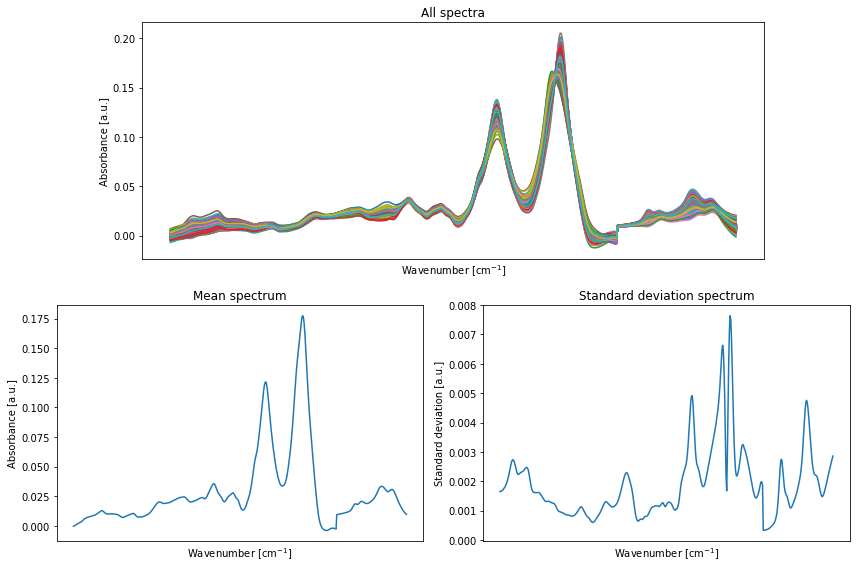

In [15]:
plot_spectra(X_gen, y_gen)

Creating a dataset of 5000 cases and 5000 controls at a level of measurement noise 100 times higher than the calibrated level.

In [16]:
X_gen, y_gen = generate_spectra(B_neg=B_neg, B_pos=B_pos, 
                                mu_neg=mu_neg, mu_pos=mu_pos, 
                                n_neg=1000, n_pos=1000, 
                                beta_std_neg='auto', beta_std_pos='auto', 
                                epsilon_std=epsilon_std*100, 
                                random_state=42)

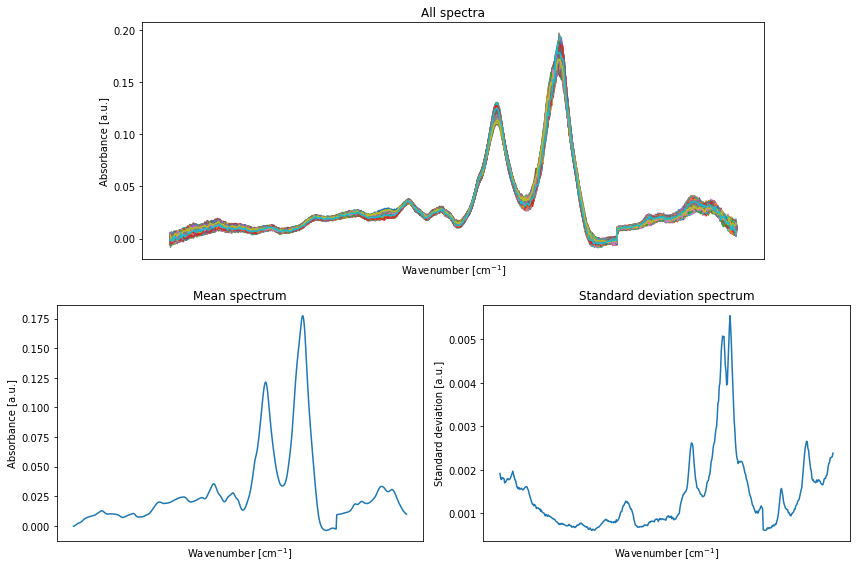

In [17]:
plot_spectra(X_gen, y_gen)